In [1]:
import datetime
print(datetime.datetime.now())
import sys
print(sys.executable)

2025-08-29 22:51:00.883240
c:\Users\Owner\Documents\GitProjects\Imbalanced_Classification\venv\Scripts\python.exe


# Step 0: Import library

In [7]:
import pandas as pd
import kagglehub

import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Step 1: Load DATASET

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

100%|██████████| 66.0M/66.0M [00:01<00:00, 34.7MB/s]

Extracting files...


Path to dataset files: C:\Users\Owner\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3


In [11]:
df_raw=pd.read_csv(r"C:\Users\Owner\Documents\GitProjects\Imbalanced_Classification\creditcardfraud\versions\3\creditcard.csv")
 

In [13]:
df_raw.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Step 2: EDA

In [14]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [15]:
df_raw.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [16]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.175161e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.384974e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.094852e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.021879e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.494498e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.620335e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.149614e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.414189e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


No response: 284315
Has response: 492
training_data_pos_scale_weight: 577.8760162601626


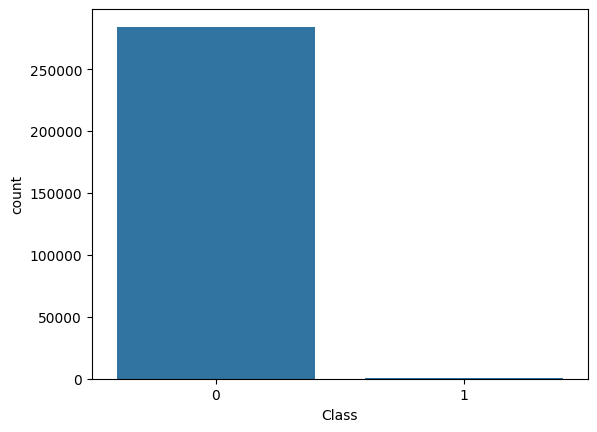

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
target_feature='Class'
def get_target_skew_rate(data_target):
    target_df = pd.DataFrame(data_target)
    sns.countplot(x=target_feature, data=target_df)

    no_renew_count = len(target_df[target_df[target_feature]==0])
    yes_renew_count = len(target_df[target_df[target_feature]==1])
    print(f"No response: {no_renew_count}")
    print(f"Has response: {yes_renew_count}")

    # save this for later...
    training_data_pos_scale_weight = (no_renew_count / yes_renew_count)
    print(f"training_data_pos_scale_weight: {training_data_pos_scale_weight}")
    return training_data_pos_scale_weight

training_data_pos_scale_weight = get_target_skew_rate(df_raw[target_feature])

<Axes: xlabel='Class', ylabel='Amount'>

(0.0, 500.0)

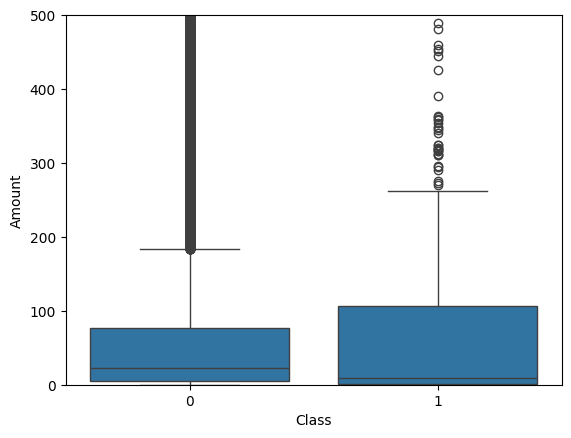

In [20]:
import seaborn as sns

sns.boxplot(x='Class', y='Amount', data=df_raw)
plt.ylim(0, 500)   # 裁剪掉极端值，方便看分布


C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\71125959.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_raw[df_raw['Class']==0]['Time'], label="Non-Fraud", shade=True)


<Axes: xlabel='Time', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\71125959.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_raw[df_raw['Class']==1]['Time'], label="Fraud", shade=True)


<Axes: xlabel='Time', ylabel='Density'>

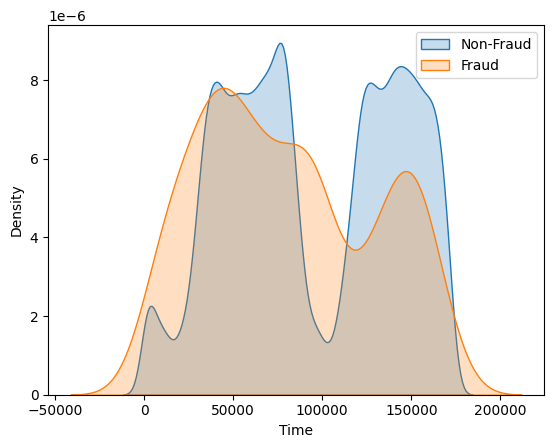

In [21]:
sns.kdeplot(df_raw[df_raw['Class']==0]['Time'], label="Non-Fraud", shade=True)
sns.kdeplot(df_raw[df_raw['Class']==1]['Time'], label="Fraud", shade=True)
plt.legend()


C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)


<Axes: xlabel='V1', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label="Fraud", shade=True)


<Axes: xlabel='V1', ylabel='Density'>

Text(0.5, 1.0, 'V1')

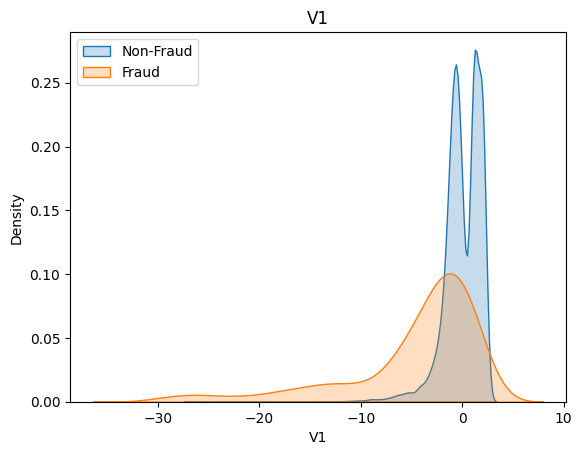

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)


<Axes: xlabel='V2', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label="Fraud", shade=True)


<Axes: xlabel='V2', ylabel='Density'>

Text(0.5, 1.0, 'V2')

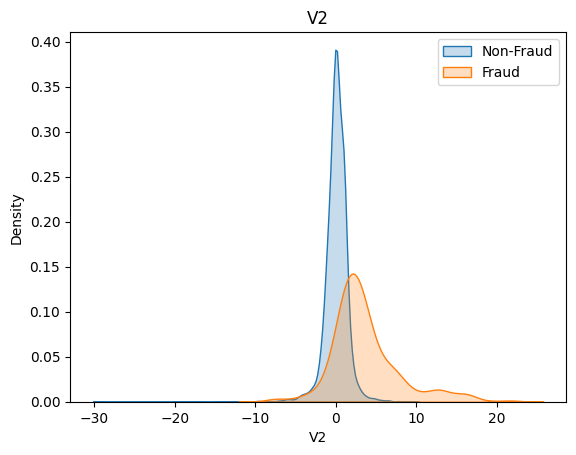

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)


<Axes: xlabel='V3', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label="Fraud", shade=True)


<Axes: xlabel='V3', ylabel='Density'>

Text(0.5, 1.0, 'V3')

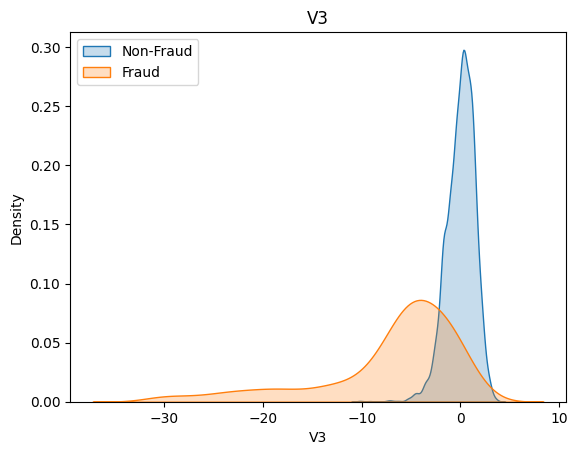

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)


<Axes: xlabel='V4', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label="Fraud", shade=True)


<Axes: xlabel='V4', ylabel='Density'>

Text(0.5, 1.0, 'V4')

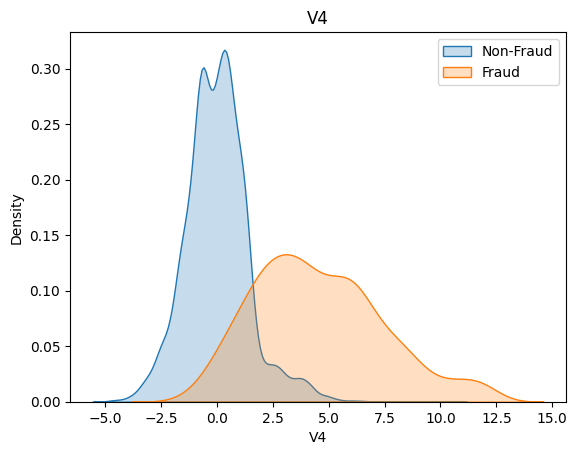

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)


<Axes: xlabel='V5', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label="Fraud", shade=True)


<Axes: xlabel='V5', ylabel='Density'>

Text(0.5, 1.0, 'V5')

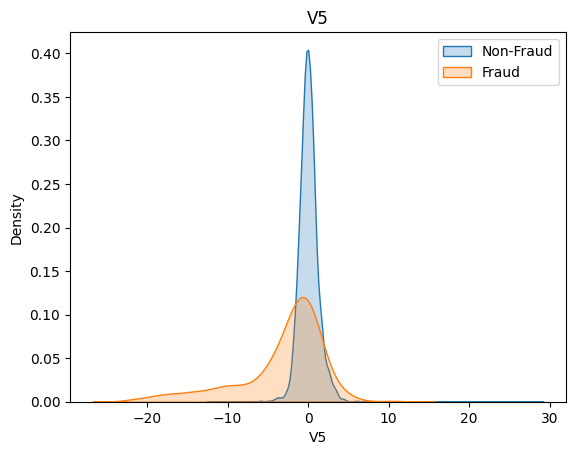

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)


<Axes: xlabel='V6', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label="Fraud", shade=True)


<Axes: xlabel='V6', ylabel='Density'>

Text(0.5, 1.0, 'V6')

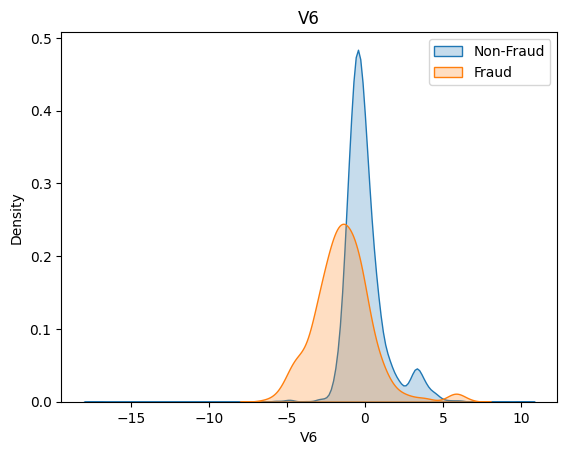

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)


<Axes: xlabel='V7', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label="Fraud", shade=True)


<Axes: xlabel='V7', ylabel='Density'>

Text(0.5, 1.0, 'V7')

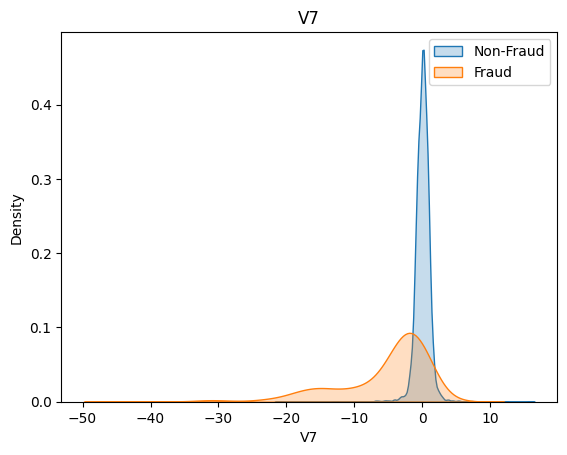

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)


<Axes: xlabel='V8', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label="Fraud", shade=True)


<Axes: xlabel='V8', ylabel='Density'>

Text(0.5, 1.0, 'V8')

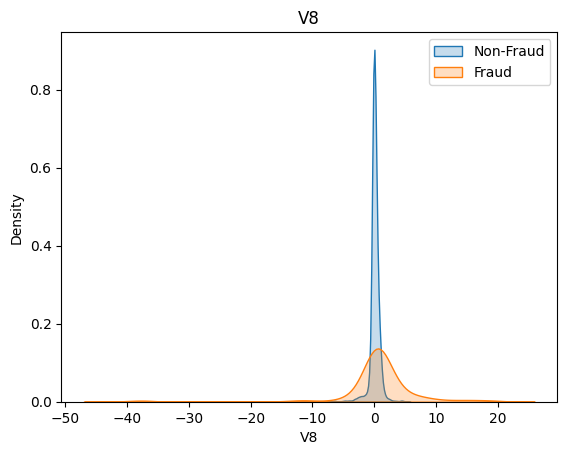

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)


<Axes: xlabel='V9', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label="Fraud", shade=True)


<Axes: xlabel='V9', ylabel='Density'>

Text(0.5, 1.0, 'V9')

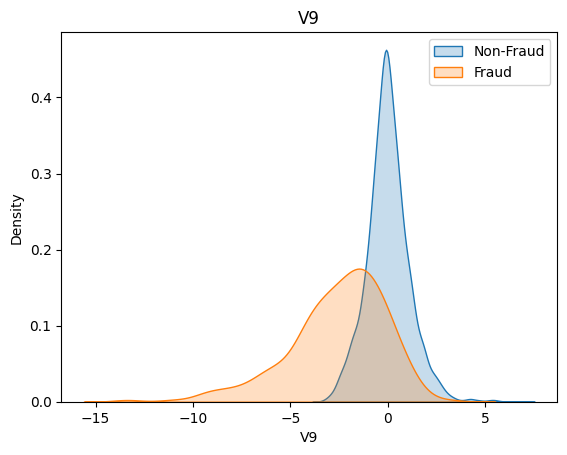

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)


<Axes: xlabel='V10', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label="Fraud", shade=True)


<Axes: xlabel='V10', ylabel='Density'>

Text(0.5, 1.0, 'V10')

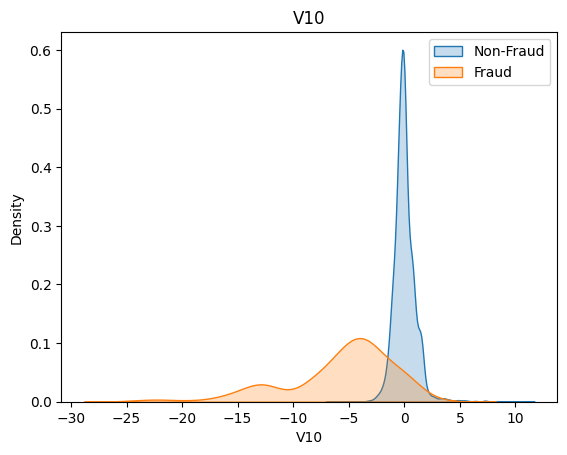

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)


<Axes: xlabel='V11', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label="Fraud", shade=True)


<Axes: xlabel='V11', ylabel='Density'>

Text(0.5, 1.0, 'V11')

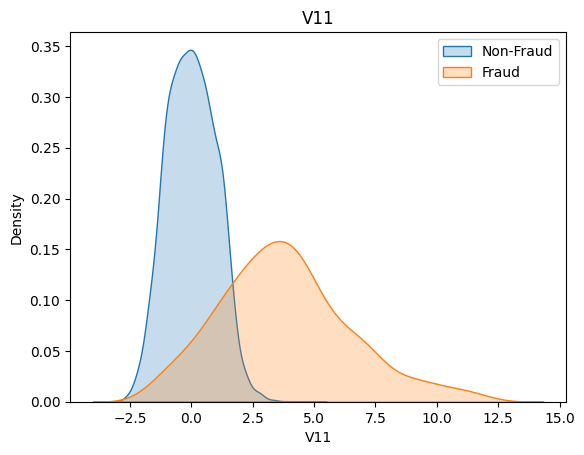

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)


<Axes: xlabel='V12', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label="Fraud", shade=True)


<Axes: xlabel='V12', ylabel='Density'>

Text(0.5, 1.0, 'V12')

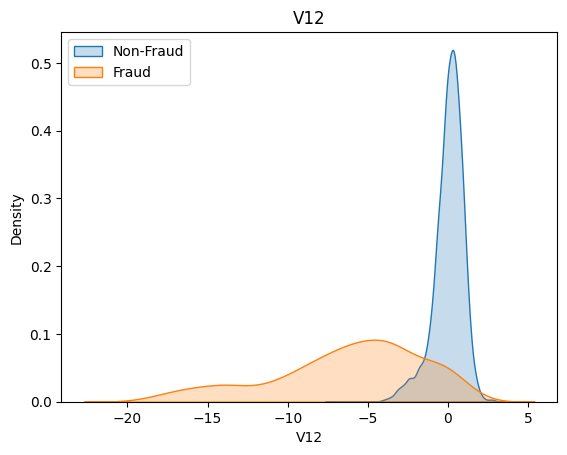

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)


<Axes: xlabel='V13', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label="Fraud", shade=True)


<Axes: xlabel='V13', ylabel='Density'>

Text(0.5, 1.0, 'V13')

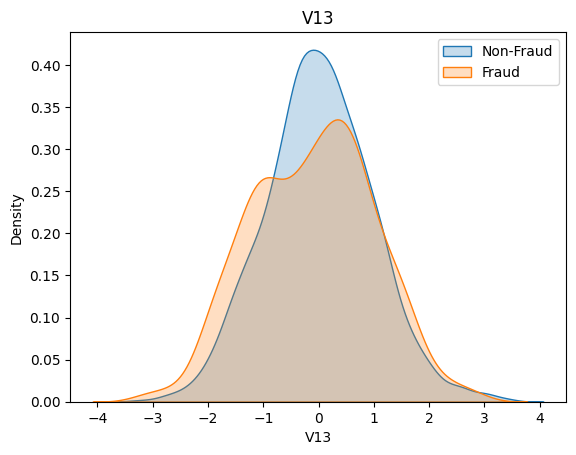

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)


<Axes: xlabel='V14', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label="Fraud", shade=True)


<Axes: xlabel='V14', ylabel='Density'>

Text(0.5, 1.0, 'V14')

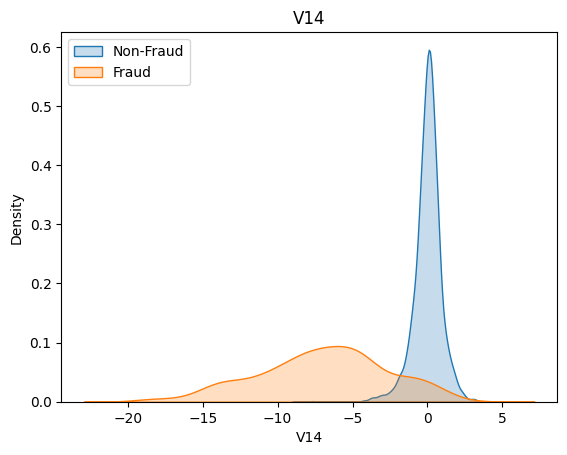

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)


<Axes: xlabel='V15', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label="Fraud", shade=True)


<Axes: xlabel='V15', ylabel='Density'>

Text(0.5, 1.0, 'V15')

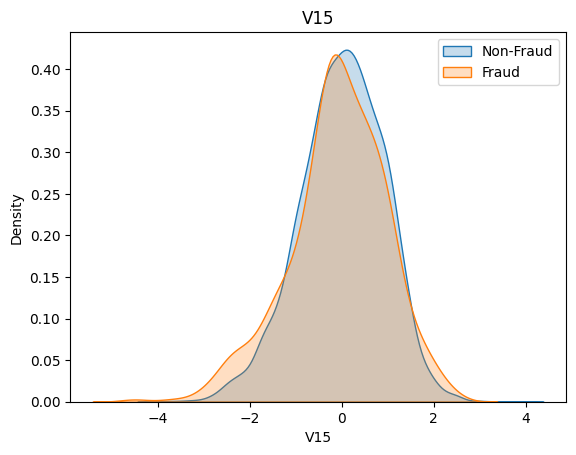

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)


<Axes: xlabel='V16', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label="Fraud", shade=True)


<Axes: xlabel='V16', ylabel='Density'>

Text(0.5, 1.0, 'V16')

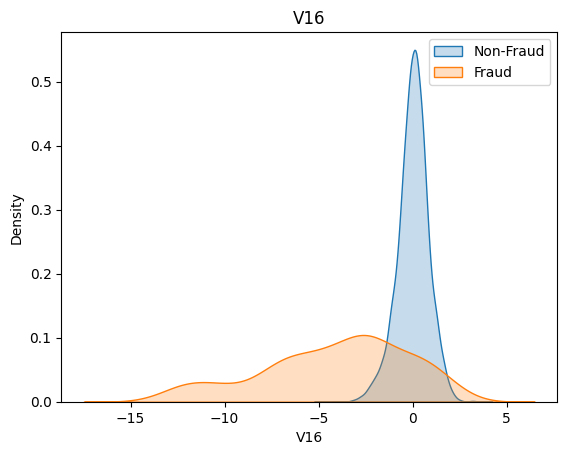

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)


<Axes: xlabel='V17', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label="Fraud", shade=True)


<Axes: xlabel='V17', ylabel='Density'>

Text(0.5, 1.0, 'V17')

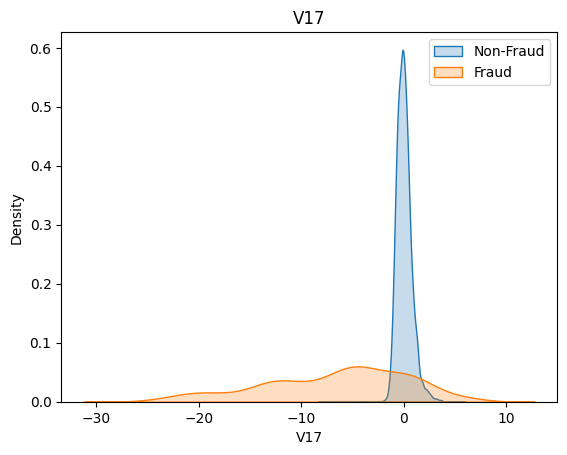

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)


<Axes: xlabel='V18', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label="Fraud", shade=True)


<Axes: xlabel='V18', ylabel='Density'>

Text(0.5, 1.0, 'V18')

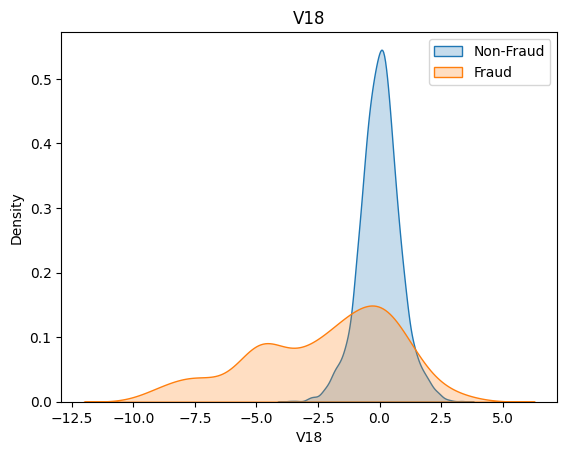

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)


<Axes: xlabel='V19', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label="Fraud", shade=True)


<Axes: xlabel='V19', ylabel='Density'>

Text(0.5, 1.0, 'V19')

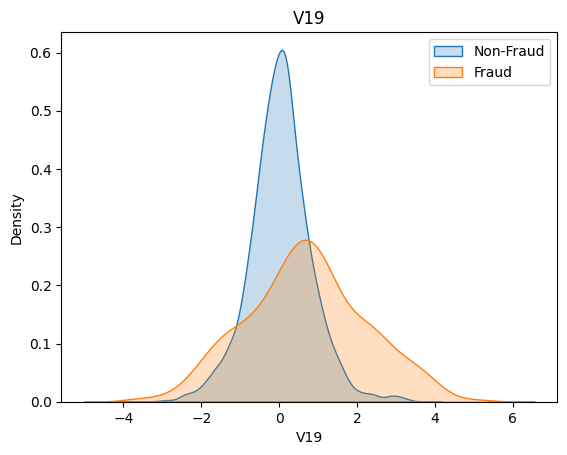

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)


<Axes: xlabel='V20', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label="Fraud", shade=True)


<Axes: xlabel='V20', ylabel='Density'>

Text(0.5, 1.0, 'V20')

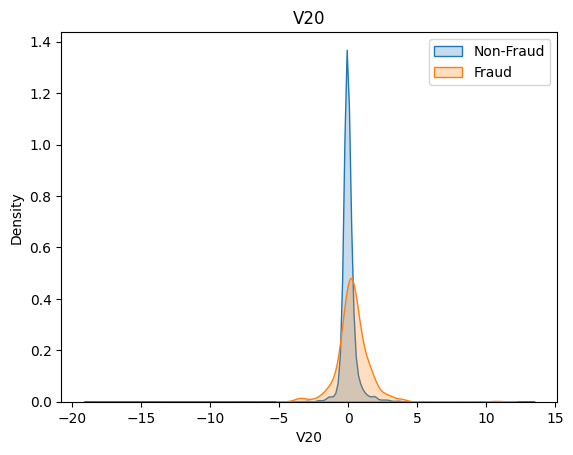

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)


<Axes: xlabel='V21', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label="Fraud", shade=True)


<Axes: xlabel='V21', ylabel='Density'>

Text(0.5, 1.0, 'V21')

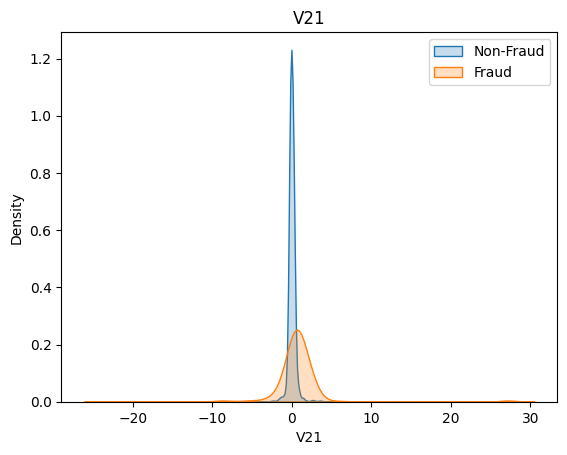

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)


<Axes: xlabel='V22', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label="Fraud", shade=True)


<Axes: xlabel='V22', ylabel='Density'>

Text(0.5, 1.0, 'V22')

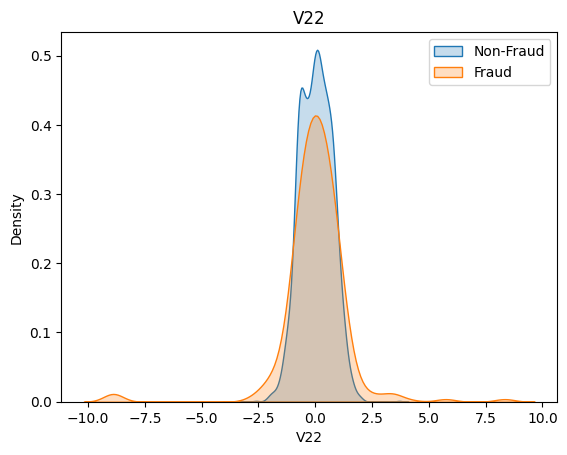

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)


<Axes: xlabel='V23', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label="Fraud", shade=True)


<Axes: xlabel='V23', ylabel='Density'>

Text(0.5, 1.0, 'V23')

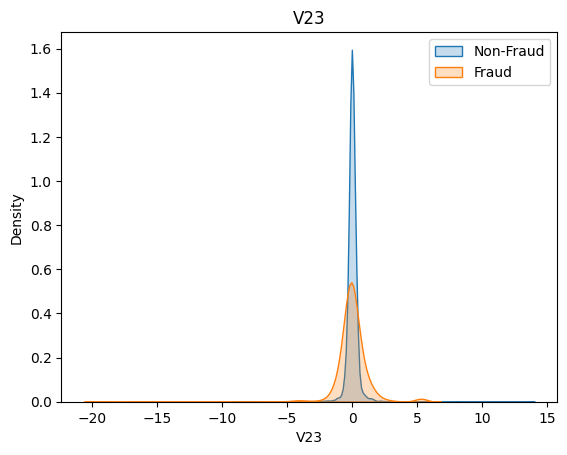

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)


<Axes: xlabel='V24', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label="Fraud", shade=True)


<Axes: xlabel='V24', ylabel='Density'>

Text(0.5, 1.0, 'V24')

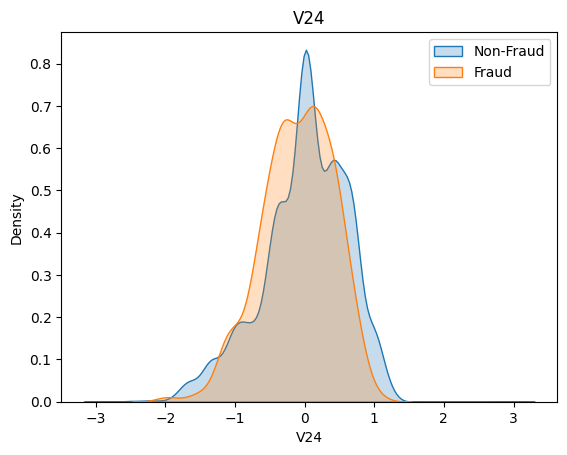

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)


<Axes: xlabel='V25', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label="Fraud", shade=True)


<Axes: xlabel='V25', ylabel='Density'>

Text(0.5, 1.0, 'V25')

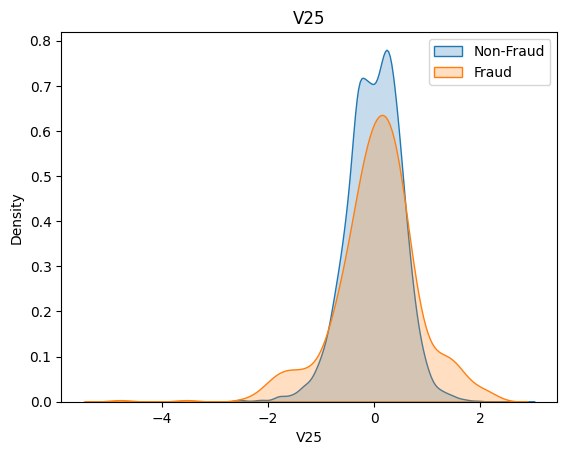

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)


<Axes: xlabel='V26', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label="Fraud", shade=True)


<Axes: xlabel='V26', ylabel='Density'>

Text(0.5, 1.0, 'V26')

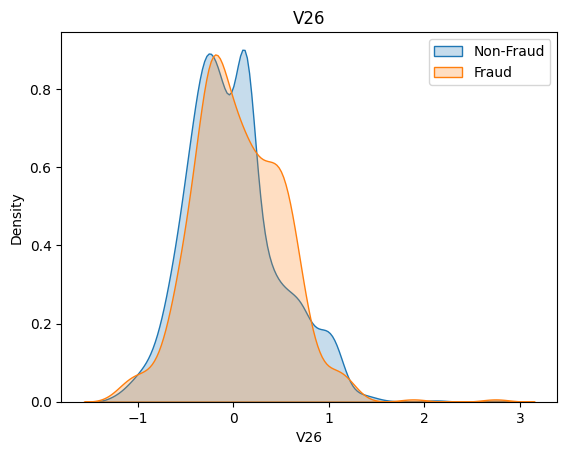

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)


<Axes: xlabel='V27', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label="Fraud", shade=True)


<Axes: xlabel='V27', ylabel='Density'>

Text(0.5, 1.0, 'V27')

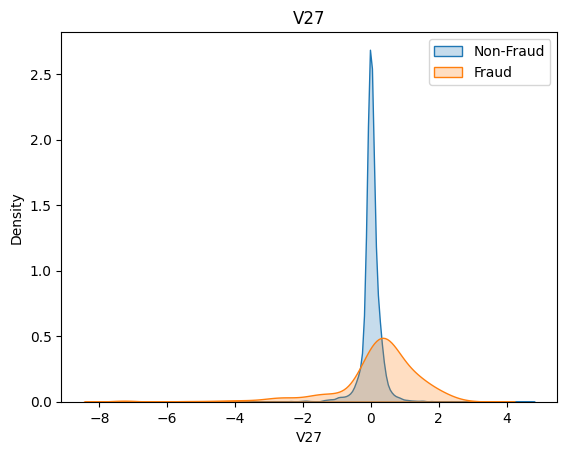

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)


<Axes: xlabel='V28', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_56704\2938627762.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label="Fraud", shade=True)


<Axes: xlabel='V28', ylabel='Density'>

Text(0.5, 1.0, 'V28')

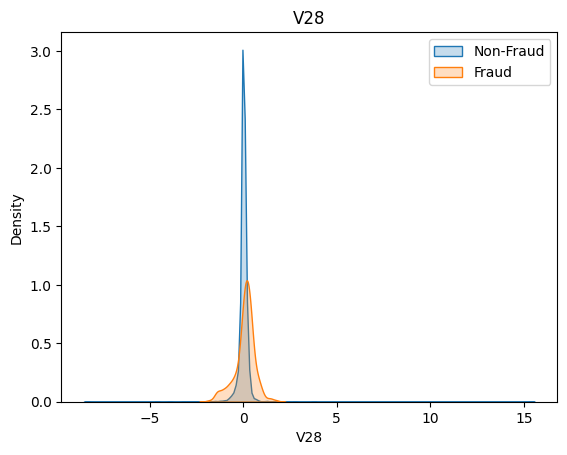

In [23]:
fraud = df_raw[df_raw['Class']==1]
nonfraud = df_raw[df_raw['Class']==0].sample(5000, random_state=42)  # 下采样一部分非欺诈便于画图

for col in [f"V{i}" for i in range(1, 29)]:
    sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)
    sns.kdeplot(fraud[col], label="Fraud", shade=True)
    plt.title(col)
    plt.legend()
    plt.show()


<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

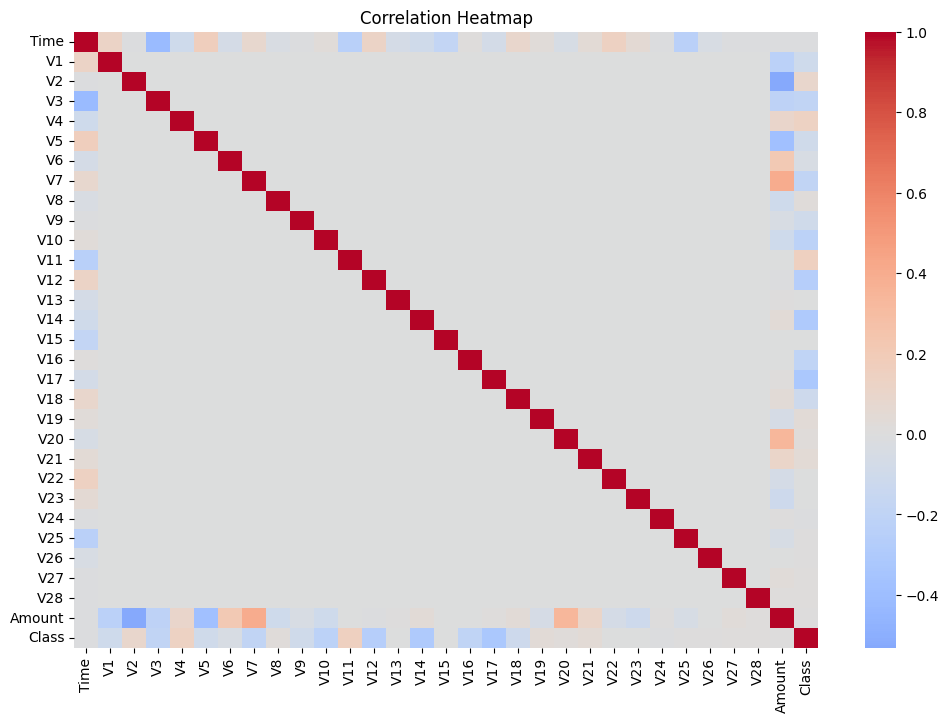

In [25]:
corr = df_raw.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


In [26]:
corr_target = corr['Class'].sort_values(ascending=False)
print(corr_target)


Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


# Step 3: Preprocessing

# Step 4: Model Baseline

# Step 5: random search cross validation Model comparation 

# Step 5: Feature Selection

# Step 6: final model 